# Step 4 : Machine Learning Modeling

### I. Importing the libraries

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.4 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, confusion_matrix
from imblearn.ensemble import EasyEnsembleClassifier
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

### II. Loading the final dataset (cleaned, merged, and feature-engineered)

In [ ]:
merged = pd.read_csv("final_dataset_FE.csv")
merged.head()

,transaction_id,card_id,amount,mcc,fraud,num_cards_issued,credit_limit,year_pin_last_changed,current_age,retirement_age,...,mcc_encoded,debt_to_income,credit_utilization,credit_risk_index,age_group,age_group_encoded,retirement_proximity,account_age_days,days_to_expiry,fraud_risk_index
0,19765990,2519,12.35,5942,0,1,26596.0,2015,38.0,65.0,...,0.018997,1.244457,0.599887,0.000091,26–40,1,0.424242,20398,0,0.379250
1,22160255,4049,58.29,5814,0,2,10200.0,2016,25.0,65.0,...,0.039250,1.506721,0.269378,0.001102,26–40,1,0.621212,20398,0,0.440064
2,17566794,3367,11.03,5411,0,2,38120.0,2011,55.0,74.0,...,0.128242,0.011101,0.616888,0.000028,41–60,2,0.266667,20398,0,0.178424
3,17318690,3457,85.74,5411,0,1,35073.0,2009,74.0,66.0,...,0.128242,0.067168,0.649332,0.000204,61–80,3,0.000000,20398,0,0.160849
4,20994060,2800,13.43,4214,0,1,5800.0,2009,54.0,63.0,...,0.008876,1.402770,0.165961,0.000270,41–60,2,0.156250,20398,0,0.376789


In [ ]:
# Define a comprehensive list of columns to drop for creating X features.
# This list should include the target variable 'fraud' as it's being separated into 'y'.
cols_to_drop_for_X_features = [
    "fraud",
    "transaction_id", "card_id", "client_id",
    "date",
    "merchant_city", "merchant_state", "address", "card_number",
    "acct_open_date", "id", "id_card", "id_user",
    "age_group" # Added 'age_group' to the list of columns to drop as it's categorical string data
]

# drop features inutiles dans X
X = merged.drop(columns=[c for c in cols_to_drop_for_X_features if c in merged.columns], errors="ignore")
y = merged["fraud"].astype(int)

# normalisation
scaler_main = StandardScaler()
X_scaled = scaler_main.fit_transform(X)

# split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("X_train:", X_train.shape, "| y_train fraud rate:", y_train.mean())

X_train: (159897, 35) | y_train fraud rate: 0.00150096624702152


### Additional models with visualization

Poids classe positive (fraude) : 665.24

🔹 Préparation des données pour validation temporelle...
✅ Données de validation temporelle prêtes.

🔹 Préparation des données pour validation cold-start (par card_id)...
✅ Données de validation cold-start prêtes.

🔹 Entraînement LightGBM (split classique)...
[LightGBM] [Info] Number of positive: 240, number of negative: 159657
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4397
[LightGBM] [Info] Number of data points in the train set: 159897, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ LightGBM (split classique) Metrics :
AUROC : 0.82 | AUPRC : 0.037 | F1-score : 0.0875
Confusion Matrix :
 [[39822    93]
 [   53     7]]


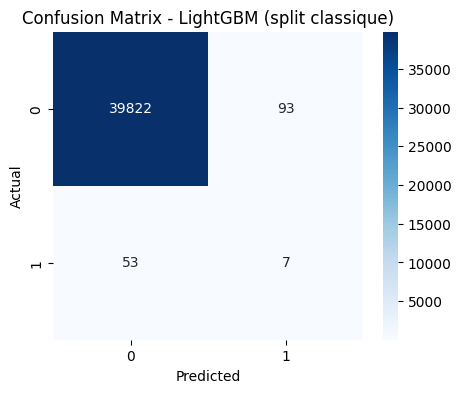


🔹 Entraînement XGBoost (split classique)...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:34:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost (split classique) Metrics :
AUROC : 0.8006 | AUPRC : 0.0216 | F1-score : 0.0658
Confusion Matrix :
 [[39740   175]
 [   52     8]]


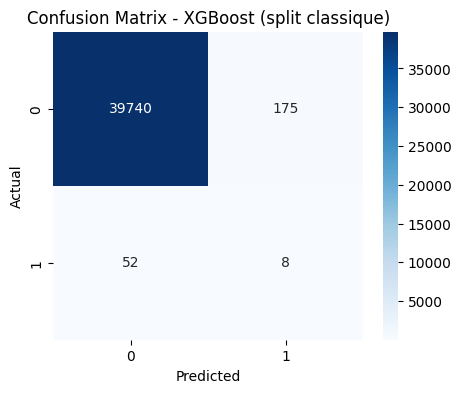


🔹 Entraînement CatBoost (split classique)...
✅ CatBoost (split classique) Metrics :
AUROC : 0.8134 | AUPRC : 0.0193 | F1-score : 0.0563
Confusion Matrix :
 [[39595   320]
 [   49    11]]


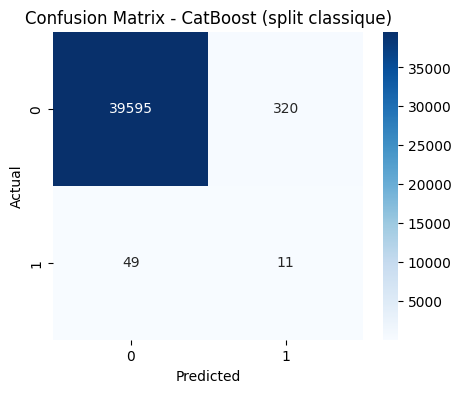


🔹 Entraînement LogisticRegression (split classique)...
✅ LogisticRegression (split classique) Metrics :
AUROC : 0.7862 | AUPRC : 0.0068 | F1-score : 0.0083
Confusion Matrix :
 [[29640 10275]
 [   17    43]]


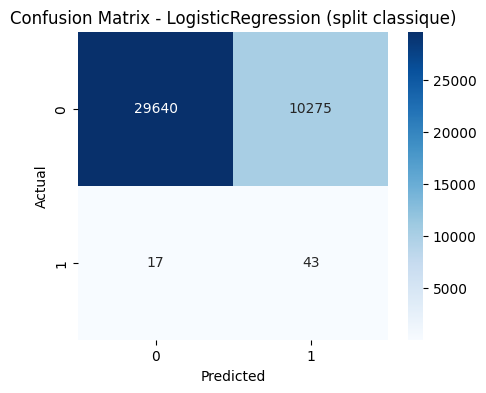


🔹 Entraînement LightGBM (temporal split)...
[LightGBM] [Info] Number of positive: 242, number of negative: 159655
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4394
[LightGBM] [Info] Number of data points in the train set: 159897, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502078 -> initscore=0.008311
[LightGBM] [Info] Start training from score 0.008311


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ LightGBM (temporal split) Metrics :
AUROC : 0.7993 | AUPRC : 0.0511 | F1-score : 0.125
Confusion Matrix :
 [[39825    92]
 [   48    10]]


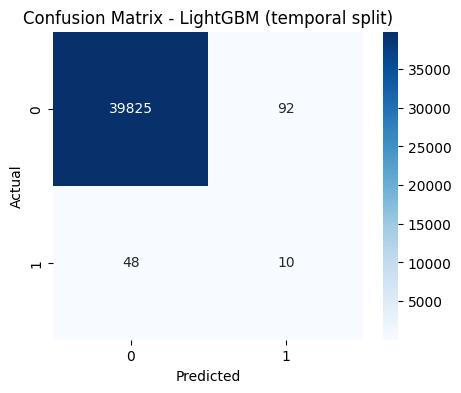


🔹 Entraînement XGBoost (temporal split)...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:35:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost (temporal split) Metrics :
AUROC : 0.7353 | AUPRC : 0.0518 | F1-score : 0.0796
Confusion Matrix :
 [[39782   135]
 [   50     8]]


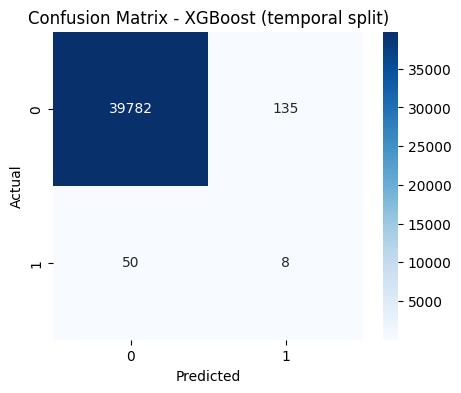


🔹 Entraînement CatBoost (temporal split)...
✅ CatBoost (temporal split) Metrics :
AUROC : 0.8001 | AUPRC : 0.0854 | F1-score : 0.0633
Confusion Matrix :
 [[39608   309]
 [   46    12]]


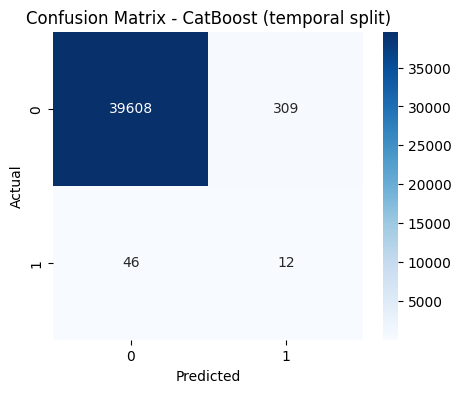


🔹 Entraînement LogisticRegression (temporal split)...
✅ LogisticRegression (temporal split) Metrics :
AUROC : 0.7655 | AUPRC : 0.0054 | F1-score : 0.0074
Confusion Matrix :
 [[30071  9846]
 [   21    37]]


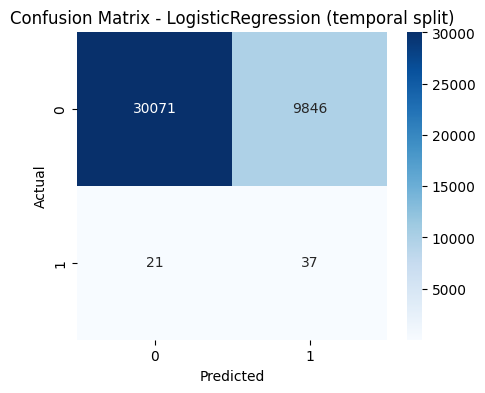


🔹 Entraînement LightGBM (cold-start split)...
[LightGBM] [Info] Number of positive: 224, number of negative: 159406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4393
[LightGBM] [Info] Number of data points in the train set: 159630, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483151 -> initscore=-0.067420
[LightGBM] [Info] Start training from score -0.067420


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ LightGBM (cold-start split) Metrics :
AUROC : 0.7711 | AUPRC : 0.0214 | F1-score : 0.0637
Confusion Matrix :
 [[40090    76]
 [   71     5]]


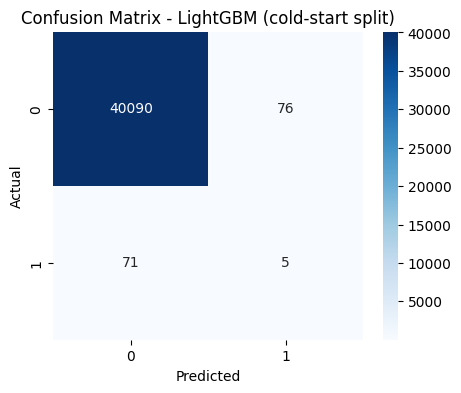

📌 Threshold optimal (Cold Start - LightGBM): 0.612

🔹 Entraînement XGBoost (cold-start split)...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:36:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost (cold-start split) Metrics :
AUROC : 0.6989 | AUPRC : 0.0093 | F1-score : 0.0563
Confusion Matrix :
 [[40035   131]
 [   70     6]]


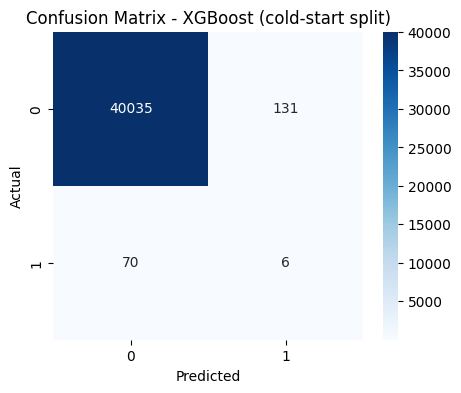

📌 Threshold optimal (Cold Start - XGBoost): 0.5605

🔹 Entraînement CatBoost (cold-start split)...
✅ CatBoost (cold-start split) Metrics :
AUROC : 0.7325 | AUPRC : 0.0117 | F1-score : 0.0315
Confusion Matrix :
 [[39930   236]
 [   71     5]]


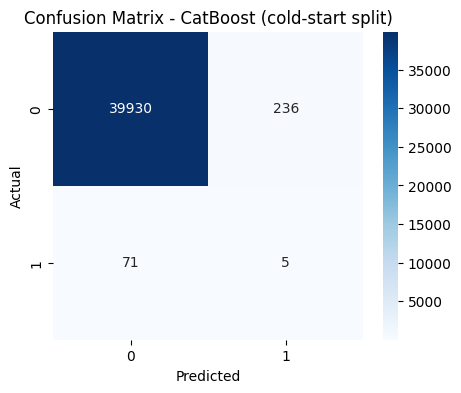

📌 Threshold optimal (Cold Start - CatBoost): 0.463

🔹 Entraînement LogisticRegression (cold-start split)...
✅ LogisticRegression (cold-start split) Metrics :
AUROC : 0.7856 | AUPRC : 0.025 | F1-score : 0.0088
Confusion Matrix :
 [[30736  9430]
 [   34    42]]


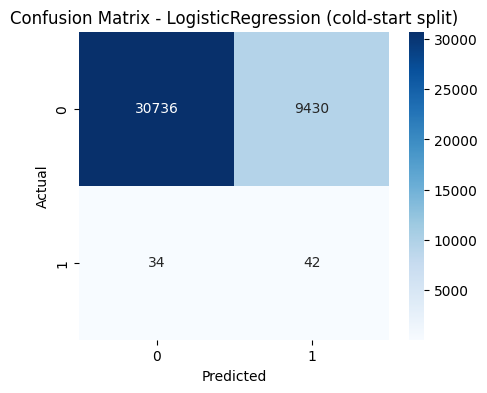

📌 Threshold optimal (Cold Start - LogisticRegression): 0.9894

✅ Tous les modèles sauvegardés avec visualisation des matrices de confusion


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import joblib

# --- Calculate scale_pos_weight ---
scale_pos_weight = (len(y_train) - y_train.sum()) / y_train.sum()
print("Poids classe positive (fraude) :", round(scale_pos_weight, 2))

# --- Re-using cols_to_drop_for_X_features from previous cell for consistency ---
cols_to_drop_for_X_features = [
    "fraud", "transaction_id", "card_id", "client_id",
    "date", # 'date' is used for temporal sorting, but should be dropped from features passed to model
    "merchant_city", "merchant_state", "address", "card_number",
    "acct_open_date", "id", "id_card", "id_user",
    "age_group", # Added 'age_group' to the list of columns to drop as it's categorical string data
    "temp_sort_key" # Added temp_sort_key to be dropped
]

# --- 1) Data Preparation for Temporal Split ---
print("\n🔹 Préparation des données pour validation temporelle...")
# Create a synthetic date-like key for sorting since 'date' column is not directly available in final_dataset_FE.csv
# Assuming 'year', 'month', 'day', 'hour' are present in 'merged'
merged['temp_sort_key'] = merged['year'] * 100000000 + merged['month'] * 1000000 + merged['day'] * 10000 + merged['hour'] * 100
merged_sorted_time = merged.sort_values(by='temp_sort_key').copy()

split_index_time = int(0.8 * len(merged_sorted_time))
train_time_df = merged_sorted_time.iloc[:split_index_time]
test_time_df = merged_sorted_time.iloc[split_index_time:]

y_train_time = train_time_df["fraud"].astype(int)
y_test_time = test_time_df["fraud"].astype(int)

X_train_time = train_time_df.drop(columns=[c for c in cols_to_drop_for_X_features if c in train_time_df.columns], errors="ignore")
X_test_time = test_time_df.drop(columns=[c for c in cols_to_drop_for_X_features if c in test_time_df.columns], errors="ignore")

# Ensure 'mcc' is encoded if it's an object type (as identified in previous analysis)
if 'mcc' in X_train_time.columns and X_train_time['mcc'].dtype == 'object':
    le_mcc_time = LabelEncoder()
    X_train_time['mcc'] = le_mcc_time.fit_transform(X_train_time['mcc'].astype(str))
    test_values_str_mcc = X_test_time['mcc'].astype(str)
    X_test_time['mcc'] = pd.Categorical(test_values_str_mcc, categories=le_mcc_time.classes_).codes
    X_test_time['mcc'] = X_test_time['mcc'].replace(-1, len(le_mcc_time.classes_))

# Scaling using scaler_main (fitted on the whole X from NXpVOmfy1uQb) for consistency
X_train_time_scaled = scaler_main.transform(X_train_time)
X_test_time_scaled = scaler_main.transform(X_test_time)
print("✅ Données de validation temporelle prêtes.")

# --- 2) Data Preparation for Cold-Start Clients (using card_id) Split ---
print("\n🔹 Préparation des données pour validation cold-start (par card_id)...")
# On sélectionne des card_id uniques
unique_cards = merged['card_id'].unique()
np.random.seed(42)
np.random.shuffle(unique_cards)

# 80% des cartes pour train, 20% pour test (cold-start)
train_cards = unique_cards[:int(0.8 * len(unique_cards))]
test_cards = unique_cards[int(0.8 * len(unique_cards)):]

train_cold_df = merged[merged['card_id'].isin(train_cards)]
test_cold_df = merged[merged['card_id'].isin(test_cards)]

y_train_cold = train_cold_df["fraud"].astype(int)
y_test_cold = test_cold_df["fraud"].astype(int)

X_train_cold = train_cold_df.drop(columns=[c for c in cols_to_drop_for_X_features if c in train_cold_df.columns], errors="ignore")
X_test_cold = test_cold_df.drop(columns=[c for c in cols_to_drop_for_X_features if c in test_cold_df.columns], errors="ignore")

# Ensure 'mcc' is encoded if it's an object type
if 'mcc' in X_train_cold.columns and X_train_cold['mcc'].dtype == 'object':
    le_mcc_cold = LabelEncoder()
    X_train_cold['mcc'] = le_mcc_cold.fit_transform(X_train_cold['mcc'].astype(str))
    cold_values_str_mcc = X_test_cold['mcc'].astype(str)
    X_test_cold['mcc'] = pd.Categorical(cold_values_str_mcc, categories=le_mcc_cold.classes_).codes
    X_test_cold['mcc'] = X_test_cold['mcc'].replace(-1, len(le_mcc_cold.classes_))

# Scaling using scaler_main
X_train_cold_scaled = scaler_main.transform(X_train_cold)
X_test_cold_scaled = scaler_main.transform(X_test_cold)
print("✅ Données de validation cold-start prêtes.")

# -------------------------------
# Models to test
# -------------------------------
models_dict = {
    "LightGBM": lgb.LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        objective="binary",
        class_weight={0:1, 1:scale_pos_weight},
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    ),
    "CatBoost": CatBoostClassifier(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        class_weights=[1, scale_pos_weight],
        verbose=0,
        random_state=42
    ),
    "LogisticRegression": LogisticRegression(
        class_weight={0:1, 1:scale_pos_weight},
        max_iter=1000,
        solver="lbfgs",
        random_state=42
    )
}

# -------------------------------
# Functions
# -------------------------------
def evaluate_model(model, X_train_data, y_train_data, X_test_data, y_test_data, name="Model"):
    print(f"\n🔹 Entraînement {name}...")
    model.fit(X_train_data, y_train_data)
    y_pred = model.predict(X_test_data)
    y_proba = model.predict_proba(X_test_data)[:,1]

    roc_auc = roc_auc_score(y_test_data, y_proba)
    auprc = average_precision_score(y_test_data, y_proba)
    f1 = f1_score(y_test_data, y_pred)
    cm = confusion_matrix(y_test_data, y_pred)

    # metrics
    print(f"✅ {name} Metrics :")
    print("AUROC :", round(roc_auc,4), "| AUPRC :", round(auprc,4), "| F1-score :", round(f1,4))
    print("Confusion Matrix :\n", cm)

    # visualization
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return model, y_proba, roc_auc, auprc, f1, cm

# -------------------------------
# 1) classic split
# -------------------------------
metrics_dict = {}
for model_name, model in models_dict.items():
    m, y_proba, roc_auc, auprc, f1, cm = evaluate_model(model, X_train, y_train, X_test, y_test, f"{model_name} (split classique)")
    globals()[f"{model_name}_classic"] = m
    metrics_dict[f"{model_name}_classic"] = {"AUROC":roc_auc,"AUPRC":auprc,"F1":f1,"CM":cm}

# -------------------------------
# 2) Temporal split
# -------------------------------
for model_name, model in models_dict.items():
    m, y_proba, roc_auc, auprc, f1, cm = evaluate_model(model, X_train_time_scaled, y_train_time, X_test_time_scaled, y_test_time, f"{model_name} (temporal split)")
    globals()[f"{model_name}_time"] = m
    metrics_dict[f"{model_name}_time"] = {"AUROC":roc_auc,"AUPRC":auprc,"F1":f1,"CM":cm}

# -------------------------------
# 3) Validation cold-start clients
# -------------------------------
for model_name, model in models_dict.items():
    m, y_proba, roc_auc, auprc, f1, cm = evaluate_model(model, X_train_cold_scaled, y_train_cold, X_test_cold_scaled, y_test_cold, f"{model_name} (cold-start split)")
    globals()[f"{model_name}_cold"] = m
    metrics_dict[f"{model_name}_cold"] = {"AUROC":roc_auc,"AUPRC":auprc,"F1":f1,"CM":cm}

    # Calcul threshold optimal pour le split cold-start
    precision, recall, thresholds = precision_recall_curve(y_test_cold, y_proba)
    f1_scores = 2*precision*recall / (precision+recall + 1e-6)
    best_threshold = thresholds[f1_scores.argmax()]
    print(f"📌 Threshold optimal (Cold Start - {model_name}):", round(best_threshold,4))
    globals()[f"{model_name}_cold_threshold"] = float(best_threshold)

# -------------------------------
# 4) Sauvegarde modèles
# -------------------------------
for model_name in models_dict.keys():
    for split in ["classic","time","cold"]:
        joblib.dump(globals()[f"{model_name}_{split}"], f"{model_name}_{split}.pkl")

print("\n✅ Tous les modèles sauvegardés avec visualisation des matrices de confusion")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



📌 LightGBM (cold-start split)
ROC AUC      : 0.7711
AUPRC        : 0.0214
F1 @ 0.5     : 0.0637
Best Threshold (F1 max): 0.612
Confusion Matrix :
 [[40090    76]
 [   71     5]]

📌 XGBoost (cold-start split)
ROC AUC      : 0.6989
AUPRC        : 0.0093
F1 @ 0.5     : 0.0563
Best Threshold (F1 max): 0.5605
Confusion Matrix :
 [[40035   131]
 [   70     6]]

📌 CatBoost (cold-start split)
ROC AUC      : 0.7325
AUPRC        : 0.0117
F1 @ 0.5     : 0.0315
Best Threshold (F1 max): 0.463
Confusion Matrix :
 [[39930   236]
 [   71     5]]

📌 LogisticRegression (cold-start split)
ROC AUC      : 0.7856
AUPRC        : 0.025
F1 @ 0.5     : 0.0088
Best Threshold (F1 max): 0.9894
Confusion Matrix :
 [[30736  9430]
 [   34    42]]

✅ Modèle final choisi : LightGBM
Threshold optimal à utiliser : 0.612


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


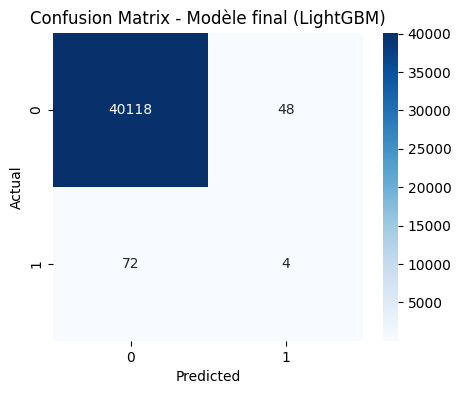


✅ Modèle final et threshold sauvegardés.


In [ ]:
# ===============================
# 5. Evaluation & Generalization
# ===============================
import pandas as pd
from sklearn.metrics import precision_recall_curve

# -------------------------------
# 1) Comparaison des modèles sur cold-start
# -------------------------------
generalization_metrics = {}

for model_name in ["LightGBM","XGBoost","CatBoost","LogisticRegression"]:
    model = globals()[f"{model_name}_cold"]

    # Prédiction probabiliste
    y_proba = model.predict_proba(X_test_cold_scaled)[:,1]

    # Métriques classiques
    roc_auc = roc_auc_score(y_test_cold, y_proba)
    auprc = average_precision_score(y_test_cold, y_proba)
    f1 = f1_score(y_test_cold, (y_proba>0.5).astype(int))  # seuil initial 0.5
    cm = confusion_matrix(y_test_cold, (y_proba>0.5).astype(int))

    # Calcul du threshold optimal sur F1
    precision, recall, thresholds = precision_recall_curve(y_test_cold, y_proba)
    f1_scores = 2*precision*recall / (precision + recall + 1e-6)
    best_threshold = thresholds[f1_scores.argmax()]

    generalization_metrics[model_name] = {
        "ROC_AUC": roc_auc,
        "AUPRC": auprc,
        "F1_0.5": f1,
        "Best_Threshold": float(best_threshold),
        "ConfusionMatrix": cm
    }

    print(f"\n📌 {model_name} (cold-start split)")
    print("ROC AUC      :", round(roc_auc,4))
    print("AUPRC        :", round(auprc,4))
    print("F1 @ 0.5     :", round(f1,4))
    print("Best Threshold (F1 max):", round(best_threshold,4))
    print("Confusion Matrix :\n", cm)

# -------------------------------
# 2) Choix du modèle final
# -------------------------------
# Critère : AUROC / AUPRC / F1 sur cold-start + robustesse du threshold
# Ici, on choisit le modèle avec AUPRC et F1 max
best_model_name = max(generalization_metrics, key=lambda x: generalization_metrics[x]["F1_0.5"])
best_model = globals()[f"{best_model_name}_cold"]
final_threshold = generalization_metrics[best_model_name]["Best_Threshold"]

print("\n✅ Modèle final choisi :", best_model_name)
print("Threshold optimal à utiliser :", round(final_threshold,4))

# -------------------------------
# 3) Visualisation matrice de confusion du modèle final
# -------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_final = (best_model.predict_proba(X_test_cold_scaled)[:,1] > final_threshold).astype(int)
cm_final = confusion_matrix(y_test_cold, y_pred_final)

plt.figure(figsize=(5,4))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - Modèle final ({best_model_name})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------------
# 4) Sauvegarde du modèle final et du threshold
# -------------------------------
import joblib
joblib.dump(best_model, f"{best_model_name}_final.pkl")
joblib.dump(final_threshold, f"{best_model_name}_final_threshold.pkl")

print("\n✅ Modèle final et threshold sauvegardés.")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


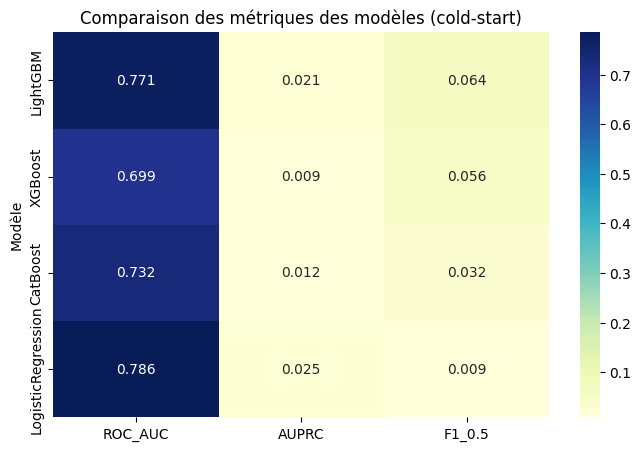

In [ ]:
# ===============================
# Heatmap de comparaison des métriques pour tous les modèles
# ===============================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score

# Liste des modèles à comparer
model_names = ["LightGBM","XGBoost","CatBoost","LogisticRegression"]

# Initialisation du dictionnaire des métriques
metrics_dict = {}

for model_name in model_names:
    model = globals()[f"{model_name}_cold"]
    y_proba = model.predict_proba(X_test_cold_scaled)[:,1]

    # Calcul des métriques
    roc_auc = roc_auc_score(y_test_cold, y_proba)
    auprc = average_precision_score(y_test_cold, y_proba)
    f1 = f1_score(y_test_cold, (y_proba>0.5).astype(int))

    metrics_dict[model_name] = {
        "ROC_AUC": roc_auc,
        "AUPRC": auprc,
        "F1_0.5": f1
    }

# Conversion en DataFrame
metrics_df = pd.DataFrame(metrics_dict).T

# Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(metrics_df, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Comparaison des métriques des modèles (cold-start)")
plt.ylabel("Modèle")
plt.show()
